<figure>
  <IMG SRC="../gfx/Logo_norsk_pos.png" WIDTH=100 ALIGN="right">
</figure>

# One-dimensional quantum systems
*Roberto Di Remigio*, *Luca Frediani*

In this assignment we require you to look at some one-dimensional quantum systems and leverage the knowledge of Python acquired during the seminars. Many of the tasks can also be achieved with pen-and-paper derivations, but we encourage to use Python as much as possible.
Remember that:
1. We have looked at similar tasks together already
2. `numpy`, `scipy`, `matplotlib` and `sympy` are very rich modules, with _extensive_ online documentation that you are encouraged to search through
3. You are encouraged to work through this assignment as a group
4. You can ask us for help if you get stuck on a specific task
5. The deadline for submission is in **two weeks**

## Exercise 1. Hydrogen-like atoms
The eigenfunctions for the hydrogen-like atoms can be expressed as the product of a radial and angular part:
\begin{equation}
\psi_{nlm}(r, \theta, \phi) = R_{nl}(r)Y_{l}^{m}(\theta, \phi)
\end{equation}
These eigenfunctions are expressed in _spherical polar coordinates_. $r$ is the distance between the electron and the nucleus, $\theta$ is the polar angle and $\phi$ the azimuthal angle.
1. Given a value of $n>0$, what are the possible valid values of $l$?
2. Given a value of $n>0$ and a valid value of $l$, how many nodes does $R_{nl}(r)$ have?

The general form of the radial function is:
\begin{equation}
 R_{nl} (r) = \sqrt {{\left ( \frac{2 Z}{n a_{\mu}} \right ) }^3\frac{(n-l-1)!}{2n[(n+l)!]} } e^{- Z r / {n a_{\mu}}} \left ( \frac{2 Z r}{n a_{\mu}} \right )^{l} L_{n-l-1}^{2l+1} \left ( \frac{2 Z r}{n a_{\mu}} \right )
\end{equation}
where:
  * $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials.
  * $a_{\mu} = {{4\pi\varepsilon_0\hbar^2}\over{\mu e^2}} = \frac{\hbar c}{\alpha\mu c^2} ={{m_{\mathrm{e}}}\over{\mu}} a_0$, $\alpha$ is the fine structure constant. Here, $\mu$ is the _reduced mass_ of the nucleus-electron system, that is, $\mu = {{m_{\mathrm{N}} m_{\mathrm{e}}}\over{m_{\mathrm{N}}+m_{\mathrm{e}}}}$
  
1. Choose $Z=1$ and plot the radial wavefunctions for $n=1, 2, 3$ and for all corresponding, valid values of $l$. **Hint: `scipy` has a module for [special functions](https://docs.scipy.org/doc/scipy-0.14.0/reference/special.html) Check there if you can find a function for the generalized Laguerre polynomials**
2. Plot the corresponding radial probability distributions. Note that this is given by $4\pi r^2|R_{nl}(r)|^2$, since we are in spherical polar coordinates!
3. Now repeat the same plots for different nuclei, _i.e._ change the atomic number $Z$ and the mass of the nucleus entering the definition of the reduced mass.

## Exercise 2. Spherical harmonics
Now that we have looked at the radial part of hydrogen-like atoms wavefunctions, we can have a closer look at their angular part. The angular part is expressed in terms of _spherical harmonics_:
\begin{equation}
Y_l^m(\theta, \phi) = (-1)^{(m+|m|)/2}\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(\cos\theta)\mathrm{e}^{\mathrm{i}m\phi}
\end{equation}
where $P_l^{|m|}(\cos\theta)$ are _associated Legendre polynomials_.
1. Given a value of $l$, what is the degeneracy of the angular part? That is, how many $m$ values are valid?
2. The spherical harmonics are, in general, complex functions. For $l$ assigned, is there a way to get the spherical harmonics for that $l$ value to be _real functions_? **Hint: it might be easier to consider the _explicit_ form of the $l=0$, $l=1$ and $l=2$ spherical harmonics to start reasoning about this question.**
3. Plot the **module**, $|Y_l^m(\theta, \phi)|$, the **real part**, $\Re(Y_l^m(\theta, \phi))$ and the **imaginary part**, $\Re(Y_l^m(\theta, \phi))$ of the spherical harmonics for $l=1, 2, 3$ and all corresponding, valid values of $m$, following this code example for $l=0, m=0$. **As you can see, `scipy` already has the definition of the [spherical harmonics](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html)**

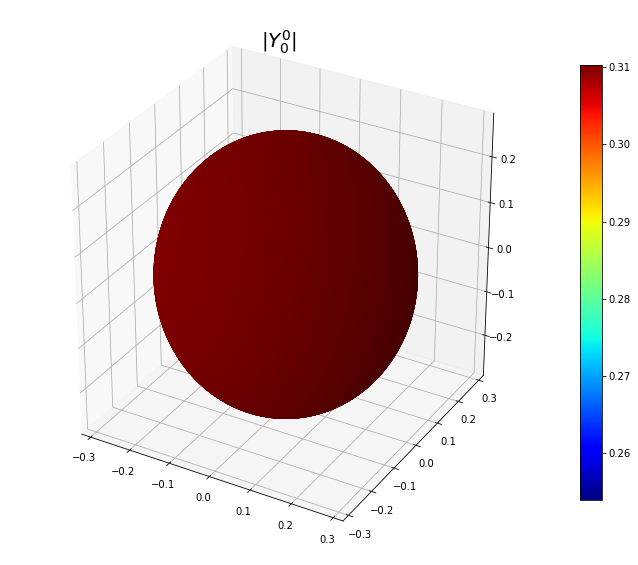

In [8]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

l = 0    # degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] # arrays of angular variables

## Plotting the module
Ylm_abs = np.abs(sp.sph_harm(m, l, PHI, THETA)) # Array with the absolute values of Ylm
# Now we convert to cartesian coordinates for the 3D representation
X_abs = Ylm_abs * np.sin(THETA) * np.cos(PHI)
Y_abs = Ylm_abs * np.sin(THETA) * np.sin(PHI)
Z_abs = Ylm_abs * np.cos(THETA)
N_abs = Ylm_abs/Ylm_abs.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X_abs, Y_abs, Z_abs, rstride=1, cstride=1, facecolors=cm.jet(N_abs))
ax.set_title(r'$|Y^0_0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Ylm_abs) # Assign the unnormalized data array to the mappable
                     # so that the scale corresponds to the values of Ylm_abs
fig.colorbar(m, shrink=0.8);

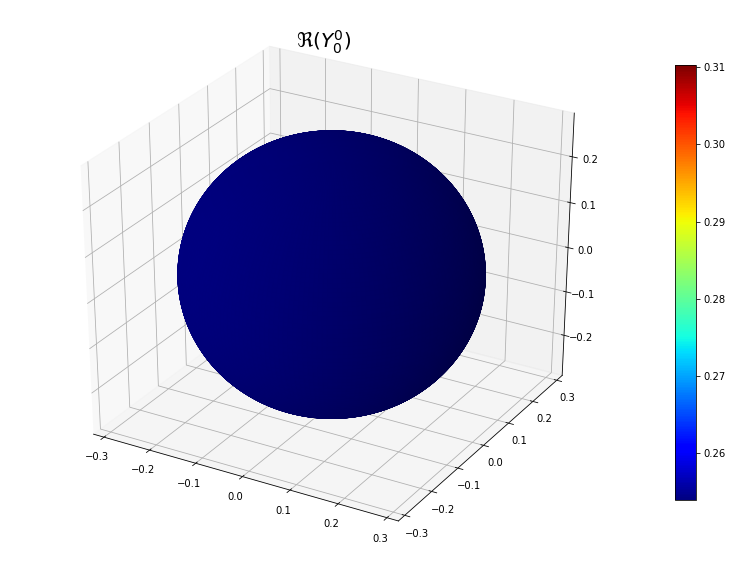

In [13]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

l = 0    # degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] # arrays of angular variables

## Plotting the real part
Ylm_real = sp.sph_harm(m, l, PHI, THETA).real # array with the real values of Ylm

X_real = Ylm_real * np.sin(THETA) * np.cos(PHI)
Y_real = Ylm_real * np.sin(THETA) * np.sin(PHI)
Z_real = Ylm_real * np.cos(THETA)

# As Ylm_real has negative values, we'll use an instance of Normalize
# see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X_real, Y_real, Z_real, rstride=1, cstride=1, facecolors=cm.jet(norm(Ylm_real)))
ax.set_title('$\Re(Y^0_0)$', fontsize=20)
m.set_array(Ylm_real)
fig.colorbar(m, shrink=0.8);

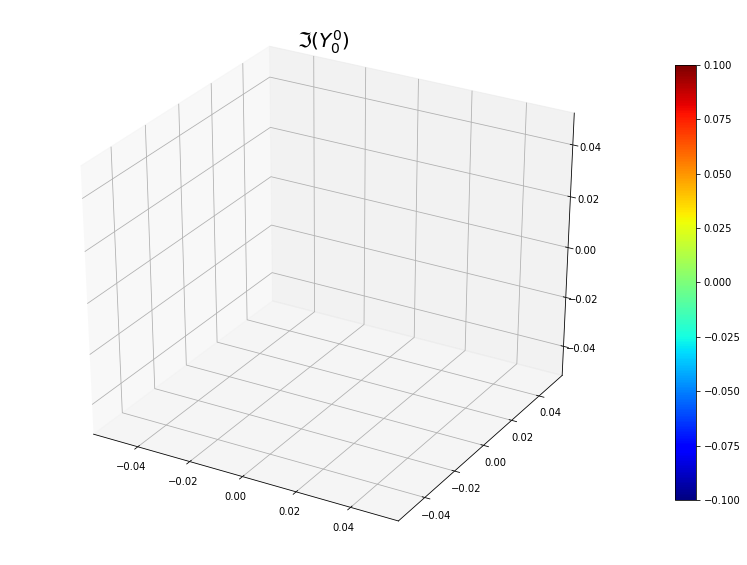

In [12]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

l = 0    # degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] # arrays of angular variables

## Plotting the imaginary part
Ylm_imag = sp.sph_harm(m, l, PHI, THETA).imag # array with the imaginary values of Ylm

X_imag = Ylm_imag * np.sin(THETA) * np.cos(PHI)
Y_imag = Ylm_imag * np.sin(THETA) * np.sin(PHI)
Z_imag = Ylm_imag * np.cos(THETA)

# As Ylm_imag has negative values, we'll use an instance of Normalize
# see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X_imag, Y_imag, Z_imag, rstride=1, cstride=1, facecolors=cm.jet(norm(Ylm_imag)))
ax.set_title('$\Im(Y^0_0)$', fontsize=20)
m.set_array(Ylm_imag)
fig.colorbar(m, shrink=0.8);

## Exercise 3. Finite potential wells
In the lectures and seminars we have considered potential wells with infinite barries, _i.e._ cases where the quantum particle is confined inside a finite space and cannot escape.
More interesting systems are those where the particle is confined within a well, with _finite_ barriers:
<figure>
  <IMG SRC="../gfx/325px-Finite_Potential_Well_Symmetric.svg.png">
</figure>
The potential is thus:
\begin{equation}
V(x) =
\begin{cases}
0 \quad\quad \text{if} \,\, -L/2\leq x \leq L/2 \\
V_0 \quad\quad \text{otherwise}
\end{cases}
\end{equation}

1. Using finite differences, solve the quantum mechanical problem for the finite potential well. You should prepare a table with the first 5 eigenvalues, plot the first 5 eigenvectors and corresponding probability distributions.
**Hint: Avoid full diagonalization of $\mathbf{H}$**
This can be done by using _sparse matrix operations_ as provided by `scipy`. You can then ask for the $k$ lowest eigenvectors and eigenvalues. The general function to use is [`scipy.sparse.linalg.eigs`](https://docs.scipy.org/doc/scipy-0.17.1/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigs). For _symmetric matrices_ it's preferable to use [`scipy.sparse.linalg.eigsh`](https://docs.scipy.org/doc/scipy-0.17.1/reference/generated/scipy.sparse.linalg.eigsh.html#scipy.sparse.linalg.eigsh)
**Read the documentation to understand how to use these functions**

2. Can this model be used as a crude approximation to the harmonic oscillator potential? Why? If yes, how would you compare the results from the two models?
**Hint: Think about the turning points of the harmonic oscillator**

3. What happens when the energy is higher that $V_0$?

#### Bonus
Another interesting potential is the _semi-infinite_ potential well:
<figure>
  <IMG SRC="../gfx/himg18.gif">
</figure>
which is a crude model for the bond energy curve of a diatomic molecule.
Use the finite difference method to compute eigenvalues and eigenvectors for this potential. Plot some of the eigenvectors and the corresponding probability distributions.
